In [84]:
## Reloading packages
%load_ext autoreload
%autoreload 2

## Adding 'FDS profiling package'
import sys
sys.path.insert(0, '/Users/harsh/Desktop/DATA_SCIENCE/PandasProfiling/')

import warnings
warnings.filterwarnings("ignore")

## Packages
import requests
import io

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from fds_profiling.visualisation.charts import wordcloud
from fds_profiling.model.variable_types import get_df_var_types

from profile_report import profiling

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
# describe_numeric_1d(df["Age"])

##### Titanic dataset

In [86]:
# s = requests.get("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv").content
df = pd.read_csv('sample_datasets/titanic.csv')

df["A"] = 1

## Metrics
#### TODO: space problem in metric name
def count_(df):
    return df

def metric_1(df):
    return df["Survived"].sum()

def metric_2(df):
    return df["Survived"].count()

total_metrics = [("metric_1", metric_1), ("metric_2", metric_2)]

In [87]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,A
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [88]:
# stopwords = set(STOPWORDS)

# wordcloud = WordCloud(
#     background_color='white',
#     stopwords=stopwords,
#     max_words=200,
#     max_font_size=40, 
#     random_state=42
# ).generate(str(series.values))

# fig = plt.figure(1)
# plt.imshow(wordcloud)
# plt.axis('off')
# return plot_360_n0sc0pe(plt)

#### Profiling

In [89]:
profiling(dataframe=df,
          target_variable = "Survived",
          user_metrics=total_metrics,
          output_file="titanic_profiling.html",
          title="Titanic Profiling"
         )

In [40]:
import seaborn as sns
from matplotlib import rcParams

In [43]:
def missing_count_row_wise(df):
    rcParams['figure.figsize'] = 10, 4
    dataframe = df

    # def missing_count_row_wise(dataframe)

    dataframe = df
    column_count = len(df.columns)

    row_count = dataframe.shape[0]

    ## missing: column wise
    missing_row_df = pd.DataFrame(dataframe.isnull().sum(axis=1).value_counts(), columns=["Number of rows"]).reset_index()

    missing_row_df["percent"] = missing_row_df["index"].apply(lambda x: 100*round(x/column_count, 2)).astype(int)
    missing_row_df["Missing cells %"] = missing_row_df.apply(lambda x: str(x["index"]) + " (" + str(x["percent"]) + "%)", axis=1)

    missing_row_df.sort_values("index", ascending=False, inplace=True)
    
    sns.barplot(x="Number of rows", y="Missing cells %", data=missing_row_df, orient="h", color="#337ab7")
    
    plt.xlabel('Number of rows', fontsize='15')
    plt.ylabel('Number of missing cells', fontsize='15')
#     plt.title("Missing values % in each column",weight="bold", fontsize='20')
    plt.tight_layout(rect=(0.1, 0.1, 0.9, 0.9))
#     return plot_360_n0sc0pe(plt)

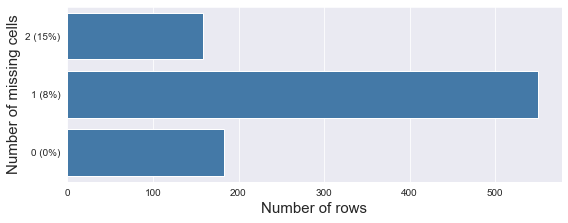

In [44]:
missing_count_row_wise(df)

In [43]:
def barchart(dataframe, numerical_column, is_percent=False):
    """
    df: frequency table
    """
    
    rcParams['figure.figsize'] = 10, 5
    
    if (is_percent):
        ## removing the % sign
#         dataframe[numerical_column] = dataframe[numerical_column].str.rstrip('%').astype('float')
        sns.barplot(x=numerical_column, y=dataframe.index, data=dataframe, orient="h", order=dataframe.index, color="#337ab7")
        plt.barh(dataframe.index.values, dataframe[numerical_column]
        plt.xlim(0, 100)
    else:
        sns.barplot(x=numerical_column, y=dataframe.index, data=dataframe, orient="h", order=dataframe.index, color="#337ab7")
#     df.plot.barh()
#     plt.subplots_adjust(left=0.1, right=0.9, top=0.7, bottom=0.2)

    plt.xticks(fontsize=12, rotation=0)
    plt.yticks(fontsize=12, rotation=0)
    plt.xlabel(numerical_column, fontsize=15)
    plt.ylabel(dataframe.index.name, fontsize=15)
#     plt.subplots_adjust(left=0.4, right=0.6, top=0.9, bottom=0.1)
    plt.tight_layout(rect=(0.1, 0.1, 0.9, 0.9))
    
    return plot_360_n0sc0pe(plt)

<BarContainer object of 3 artists>

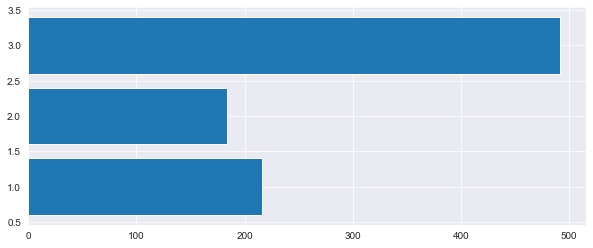

In [69]:
plt.barh(d.index.values, d["Survived"], )

In [52]:
d = pd.DataFrame(df.groupby("Pclass")["Survived"].count())

In [56]:
d

,Survived
Pclass,
1,216
2,184
3,491


In [58]:
d.index.values

array([1, 2, 3])

In [51]:
d = df.set_index("PassengerId")

In [54]:
d.index.name

'PassengerId'

In [30]:
import seaborn as sns
import numpy as np

In [31]:
matplotlib.style.use(resource_filename(__name__, "pandas_profiling.mplstyle"))

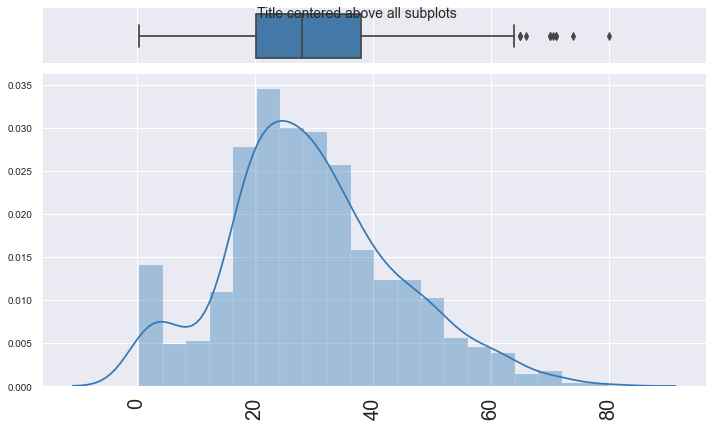

In [158]:
def histogram(series: pd.Series):
    from matplotlib import rcParams

    # figure size in inches
    rcParams['figure.figsize'] = 10, 6
    
    x = np.array(series.dropna())
    
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)}
                                   )

    sns.boxplot(x, ax=ax_box, color="#337ab7")
    sns.distplot(x, ax=ax_hist, color="#337ab7")
    
    f.suptitle("Title centered above all subplots", fontsize=14)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    
    plt.xticks(fontsize=20, rotation=90)
    plt.tight_layout()

histogram(df["Age"])

<Figure size 720x288 with 0 Axes>

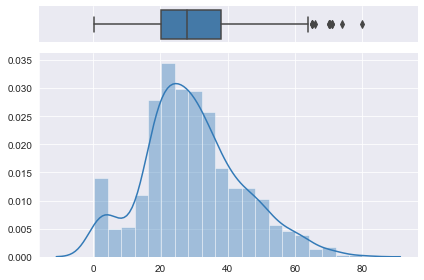

In [19]:
histogram(df["Age"])

In [122]:
dataframe[categorical_col].value_counts(normalize=True).mul(100).round(1).reset_index(name="Count Percent (%)")

,index,Count Percent (%)
0,3,55.1
1,1,24.2
2,2,20.7


In [140]:
dataframe =df
categorical_col = "Pclass"
metrics = total_metrics
    
metrics_df = pd.DataFrame(dataframe[categorical_col].value_counts(normalize=True).mul(100).round(1)).rename(columns={categorical_col:"Count Percent(%)"}).rename_axis(categorical_col).reset_index()

In [155]:
def groupby_aggregator(dataframe, categorical_col, metrics):
    
    metrics_df = pd.DataFrame(dataframe[categorical_col].value_counts(normalize=True).mul(100).round(1)).rename(columns={categorical_col:"Count Percent(%)"}).rename_axis(categorical_col).reset_index()
    
    for metric_name, metric_func in metrics:
        metric_df = dataframe.groupby(categorical_col).apply(metric_func).reset_index(name=metric_name)
        
        metrics_df = pd.merge(metric_df, metrics_df, how="outer", on=categorical_col) if metrics_df.shape[0]!=0 else metric_df
        
        
    ## reordering
    print 
    metrics_df = metrics_df[[categorical_col] + [metric_i[0] for metric_i in metrics] + ["Count Percent(%)"]]

    return metrics_df.set_index(categorical_col)

In [156]:
groupby_aggregator(df, "Pclass", total_metrics)

,metric_1,metric_2,Count Percent(%)
Pclass,,,
1,136,216,24.2
2,87,184,20.7
3,119,491,55.1


In [97]:
metrics_df

NameError: name 'metrics_df' is not defined

In [96]:
groupby_aggregator(df, "Pclass", total_metrics)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [76]:
pd.DataFrame(df["Pclass"].value_counts(normalize=True)).mul(100).round(1).astype(str) + '%'

,Pclass
3,55.1%
1,24.2%
2,20.7%


,Count %
3,55.1
1,24.2
2,20.7


In [64]:
d = groupby_aggregator(df, "Pclass", total_metrics)

count_df = df["Pclass"].value_counts().reset_index().rename(columns=["Frequency"], axis=1)
d.join(count_df)

TypeError: Cannot specify both 'axis' and any of 'index' or 'columns'

In [61]:
d

,metric_1,metric_2
Pclass,,
1,136,216
2,87,184
3,119,491


In [50]:
sum_1 = d["metric_1"].sum()
d["metric_1"] = d["metric_1"].apply(lambda x: str(x) + " (" + str(round(x*100/sum_1, 1)) + ")")

In [51]:
d

,metric_1,metric_2
Pclass,,
1,136 (39.8),216
2,87 (25.4),184
3,119 (34.8),491


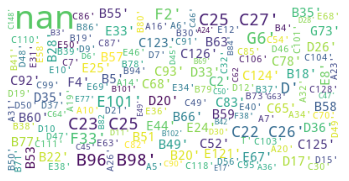

In [196]:
wordcloud(df["Cabin"].values)

In [189]:
df["Cabin"].values

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6',
       'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan,
       'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan,
       nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan,
       nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan,
       nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan,
       'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan,
       'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan,
       'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan,
       'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [140]:
import seaborn as sns
from fds_profiling.visualisation.image_encoding import hex_to_rgb, plot_360_n0sc0pe

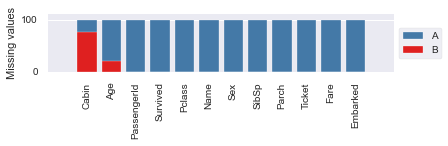

In [148]:
dataframe = df

row_count = dataframe.shape[0]

## missing: column wise
missing_column_df = dataframe.isnull().sum()
missing_column_df = pd.DataFrame(missing_column_df, columns=["Missing values"])

missing_column_df["values"] = row_count
missing_column_df = missing_column_df.apply(lambda x: 100*round(x/row_count, 2)).astype(int)
missing_column_df.sort_values("Missing values", ascending=False, inplace=True)


## bar plot
sns.set_style("darkgrid")
## plot 1 - "total" - (top) series
sns.barplot(x=missing_column_df.index, y="values", data=missing_column_df, color="#337ab7", label="A")

## plot 2 - overlay - "bottom" series
sns.barplot(x=missing_column_df.index, y="Missing values", data=missing_column_df, color="red", label="B")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation="90")
plt.subplots_adjust(left=0.1, right=0.9, top=0.7, bottom=0.5)
plt.margins(.1, 0.1)

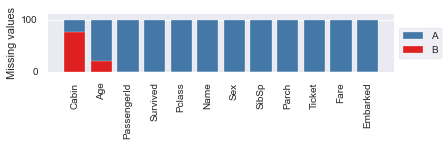

#### Network x

In [8]:
import networkx as nx
from fds_profiling.model.variable_types import get_df_var_types

In [9]:
column_types = get_df_var_types(df)
# column_types

In [10]:
## associations df
from fds_profiling.model.associations import associations
assn_df = associations(df, column_types)
assn_df["assn"] = abs(assn_df["association"])

## filter
assn_df = assn_df[assn_df["assn"] >= .01]

In [49]:
# networkplot(df, column_types, assn_df)

In [50]:
assn_df.head(2)

,col_a,association,col_b,type_,assn
110,Fare,0.59,Pclass,NUM-CAT,0.59
33,Pclass,0.59,Fare,CAT-NUM,0.59


In [51]:
## 1 step: drawing edges
G = nx.from_pandas_edgelist(assn_df,
                            source='col_a', target='col_b',
                            edge_attr=["assn", "type_"],
                            create_using=nx.DiGraph())

In [52]:
corr_edges = [(u,v) for (u,v,d) in G.edges(data=True) if d['type_'] == "NUM-NUM"]
corr_ratio_edges = [(u,v) for (u,v,d) in G.edges(data=True) if d['type_'] in ("NUM-CAT", "CAT-NUM")]
theil_edges = [(u,v) for (u,v,d) in G.edges(data=True) if d['type_'] in ("CAT-CAT")]

In [53]:
## 2 step: size and color attribute of node

## size attirbute
size_df = assn_df.groupby("col_a", as_index=False)["assn"].sum().rename(columns={"assn":"size"})
## - normalizing
max_size = size_df["size"].max()
size_df["size"] = size_df["size"]/max_size

##
for i in list(G.nodes()):
    G.nodes[i]['size'] = size_df[size_df['col_a']==i]['size'].values[0]
    
    if (column_types[i] == "BOOL"):
        G.nodes[i]['color'] = "#c03d3e"
    elif (column_types[i] == "CAT"):
        G.nodes[i]['color'] = "#3a923a"
    elif (column_types[i] == "NUM"):
        G.nodes[i]['color'] = "#337ab7"
    else:
        G.nodes[i]['color'] = "blue"

In [54]:
## node shape: https://matplotlib.org/api/markers_api.html#module-matplotlib.markers

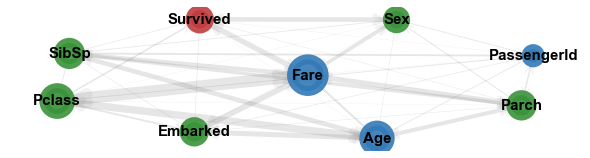

In [127]:
# fixing the size of the figure 
plt.figure(figsize =(10, 4)) 
  
# ## color, size, width
node_color = [nx.get_node_attributes(G, 'color')[v] for v in G] 
node_size = [1000*nx.get_node_attributes(G, 'size')[v] for v in G]  
edge_width = [20*G[u][v]['assn'] for u, v in G.edges()] 

## layout
pos=nx.spring_layout(G, iterations=50)

# node labels
nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif',with_labels = True, font_color="#000000", font_weight="bold")

## nodes
nx.draw_networkx_nodes(G, pos=pos, node_color = node_color, node_size = node_size, node_shape = "o", alpha=0.9,linewidths=10)
 
# edges
nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.1, edge_color="grey", arrowsize=20, arrowstyle='->')

plt.axis('off') 
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.7, bottom=0.2)

In [90]:
assn_df[assn_df["type_"] == "CAT-CAT"]

,col_a,association,col_b,type_,assn
16,Survived,0.23,Sex,CAT-CAT,0.23
49,Sex,0.23,Survived,CAT-CAT,0.23
79,SibSp,0.18,Parch,CAT-CAT,0.18
90,Parch,0.15,SibSp,CAT-CAT,0.15
35,Pclass,0.10,Embarked,CAT-CAT,0.10
25,Pclass,0.09,Survived,CAT-CAT,0.09
134,Embarked,0.07,Pclass,CAT-CAT,0.07
14,Survived,0.06,Pclass,CAT-CAT,0.06
88,Parch,0.05,Sex,CAT-CAT,0.05
76,SibSp,0.04,Sex,CAT-CAT,0.04


In [181]:
assn_df[(assn_df["type_"] == "CAT-CAT") & ((assn_df["col_a"] == "Pclass") | (assn_df["col_b"] == "Pclass"))]

,col_a,association,col_b,type_,assn
35,Pclass,0.10,Embarked,CAT-CAT,0.10
25,Pclass,0.09,Survived,CAT-CAT,0.09
134,Embarked,0.07,Pclass,CAT-CAT,0.07
14,Survived,0.06,Pclass,CAT-CAT,0.06
74,SibSp,0.04,Pclass,CAT-CAT,0.04
30,Pclass,0.04,SibSp,CAT-CAT,0.04
86,Parch,0.01,Pclass,CAT-CAT,0.01
50,Sex,0.01,Pclass,CAT-CAT,0.01
31,Pclass,0.01,Parch,CAT-CAT,0.01
28,Pclass,0.01,Sex,CAT-CAT,0.01


In [123]:
assn_df.head(20)

,col_a,association,col_b,type_,assn
110,Fare,0.59,Pclass,NUM-CAT,0.59
33,Pclass,0.59,Fare,CAT-NUM,0.59
62,Age,0.37,Pclass,NUM-CAT,0.37
29,Pclass,0.37,Age,CAT-NUM,0.37
141,Embarked,0.28,Fare,CAT-NUM,0.28
119,Fare,0.28,Embarked,NUM-CAT,0.28
21,Survived,0.26,Fare,CAT-NUM,0.26
93,Parch,0.26,Fare,CAT-NUM,0.26
109,Fare,0.26,Survived,NUM-CAT,0.26
115,Fare,0.26,Parch,NUM-CAT,0.26


In [91]:
# Graph with Custom nodes:
plt.figure(figsize=(12, 12))
nx.draw(G,
        with_labels=True,
        ,
        
        # node customizations
        node_size=1500,
        node_color="orange",
        node_shape="o",
        alpha=0.4,
        linewidths=5,
        
        # label customization
        font_size=18,
        font_color="#333333",
        font_weight="bold",
        
        # edge customization
        width=5,
        edge_color="orange",
        style="solid"
       )

plt.show()

SyntaxError: invalid syntax (<ipython-input-91-920290b22b92>, line 5)

In [371]:
# Using pandas dataframe
G = nx.from_pandas_edgelist(associations_df[associations_df["association"] > .1], "col_a", 'col_b', edge_attr="association")

# ## Creating node
for column in df.columns:
    G.add_node(column)

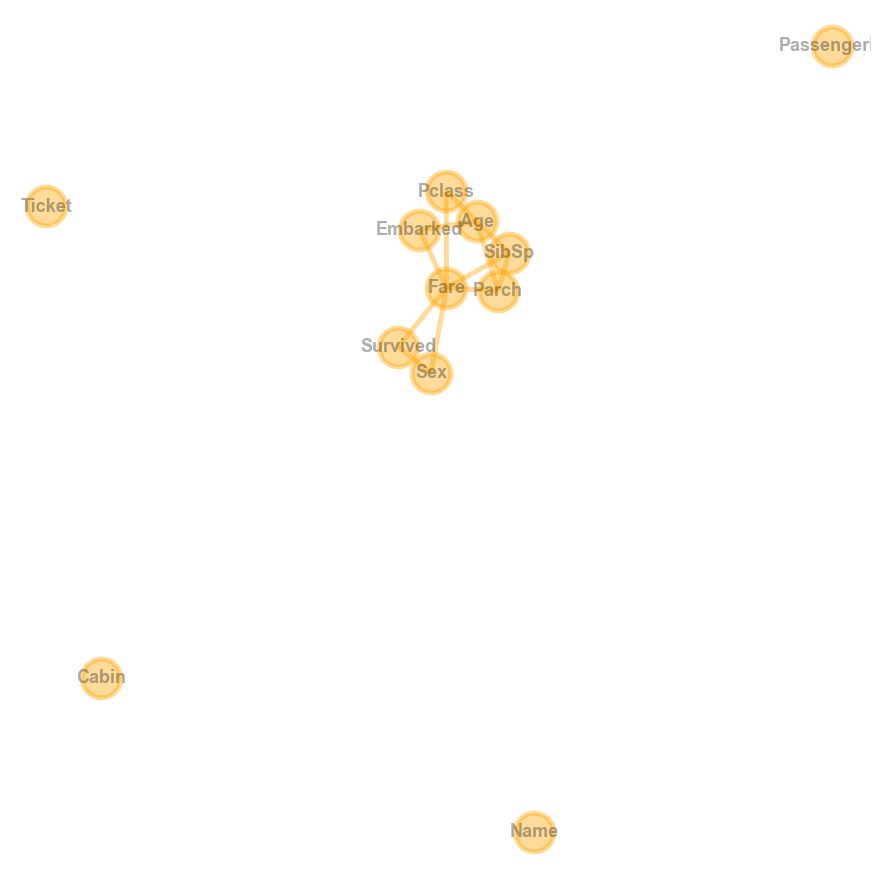

In [375]:
# Graph with Custom nodes:
plt.figure(figsize=(12, 12))
nx.draw(G,
        with_labels=True,
        pos=nx.spring_layout(G, iterations=50),
        
        # node customizations
        node_size=1500,
        node_color="orange",
        node_shape="o",
        alpha=0.4,
        linewidths=5,
        
        # label customization
        font_size=18,
        font_color="#333333",
        font_weight="bold",
        
        # edge customization
        width=5,
        edge_color="orange",
        style="solid"
       )

plt.show()

In [376]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 12))

# # 1. Create the graph
# G = nx.from_pandas_edgelist(associations_df.head(5), "col_a", 'col_b', edge_attr="association")

# # ## Creating node
# for column in df.columns:
#     G.add_node(column)

# # 2. Create a layout for our nodes 
# layout = nx.spring_layout(G, iterations=50)    

# # G = nx.from_pandas_edgelist(df,'number','contactnumber', edge_attr='callduration')
# durations = [i['association']*10 for i in dict(G.edges).values()]
# labels = [i for i in dict(G.nodes).keys()]
# labels = {i:i for i in dict(G.nodes).keys()}

# fig, ax = plt.subplots(figsize=(12,5))
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, layout, ax = ax, labels=True, node_size=400)
# nx.draw_networkx_edges(G, layout, edge_color='#FF0000')
# nx.draw_networkx_labels(G, layout, labels, ax=ax)


# plt.axis('off')
# plt.show()

In [377]:
# # G = nx.from_pandas_edgelist(df,'number','contactnumber', edge_attr='callduration')
# durations = [i['association']*10 for i in dict(G.edges).values()]
# labels = [i for i in dict(G.nodes).keys()]
# labels = {i:i for i in dict(G.nodes).keys()}

# fig, ax = plt.subplots(figsize=(12,5))
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, ax = ax, labels=True, node_size=400)
# nx.draw_networkx_edges(G, pos, width=durations, ax=ax)
# nx.draw_networkx_labels(G, pos, labels, ax=ax)


# plt.axis('off')
# plt.show()

In [231]:
# import networkx library
import networkx as nx

In [239]:
corr = df.iloc[:,0:4].corr()

links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']

# correlation
threshold = -0.2

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] >= threshold ) & (links['var1'] != links['var2']) ]

In [241]:
links_filtered.head(2)

,var1,var2,value
1,PassengerId,Survived,-0.005007
2,PassengerId,Pclass,-0.035144


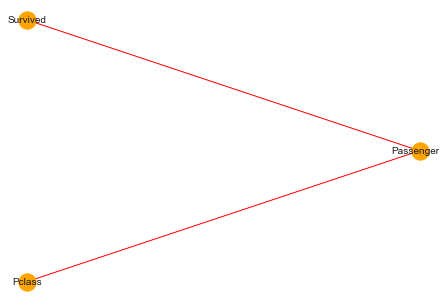

In [242]:
# Transform it in a links data frame (3 columns only):



 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size=10)

In [263]:
df = pd.DataFrame({'ID':[1,2,3,4,5,6], 
                   'First Name':['Felix', 'Jean', 'James', 'Daphne', 'James', 'Peter'], 
                   'Family Name': ['Revert', 'Durand', 'Wright', 'Hull', 'Conrad', 'Donovan'],
                   'Phone number': ['+33 6 12 34 56 78', '+33 7 00 00 00 00', '+33 6 12 34 56 78', '+33 6 99 99 99 99', '+852 0123 4567', '+852 0123 4567'],
                   'Email': ['felix.revert@gmail.com', 'jean.durand@gmail.com', 'j.custom@gmail.com', pd.np.nan, 'j.custom@gmail.com', pd.np.nan]})

/Users/harsh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


In [264]:
df.head(2)

,ID,First Name,Family Name,Phone number,Email
0,1,Felix,Revert,+33 6 12 34 56 78,felix.revert@gmail.com
1,2,Jean,Durand,+33 7 00 00 00 00,jean.durand@gmail.com


In [265]:
column_edge = 'Phone number'
column_ID = 'ID'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates() # select columns, remove NaN

# To create connections between people who have the same number,
# join data with itself on the 'ID' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

In [266]:
# By joining the data with itself, people will have a connection with themselves.
# Remove self connections, to keep only connected people who are different.
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]
    
# To avoid counting twice the connections (person 1 connected to person 2 and person 2 connected to person 1)
# we force the first ID to be "lower" then ID_2
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [267]:
import networkx as nx

G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)

G.add_nodes_from(nodes_for_adding=df.ID.tolist())

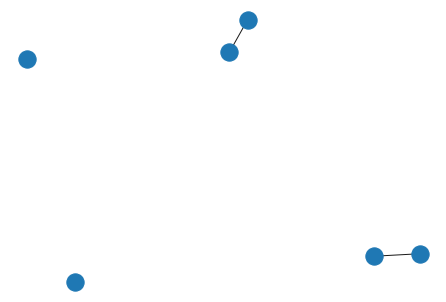

In [268]:
nx.draw(G)

In [1]:
#no